# Predicting Hotel Booking Cancellation
### This notebook documents the process that took place in predicting whether or not hotel guests would cancel their bookings. I will go through the machine learning process, from cleaning, answering questions, identifying trends and applying multiple maching learning algorithms and comparing them to find out the most suitable one. 

## Exploratory Data Analysis

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_csv('D:\\tuansihan\\06 Projects\\02 Predicting Hotel Booking Cancellation\\hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [114]:
df.shape

(119390, 32)

In [115]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [116]:
def data_clean(df):
    df.fillna(0, inplace=True)
    print(df.isnull().sum())

In [117]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [118]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [119]:
list = ['adults', 'children', 'babies']
for i in list:
    print('{} has unique values as {}'.format(i, df[i].unique()))

adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has unique values as [ 0.  1.  2. 10.  3.]
babies has unique values as [ 0  1  2 10  9]


In [120]:
### Children, adults & babies cant be zero at the same time

In [121]:
df.shape

(119390, 32)

In [122]:
len(df[df['adults']==0])

403

In [123]:
filter=(df['children']==0) & (df['adults']==0) & (df['babies']==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [124]:
### Visualise Dataframe where children, adults & babies are 0

In [125]:
pd.set_option('display.max_columns',32)

In [126]:
filter=(df['children']==0) & (df['adults']==0) & (df['babies']==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [127]:
data1 = df[~filter]
data1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


## Spatial Analysis to identify where customers come from

In [128]:
country_data = data1[data1['is_canceled']==0]['country'].value_counts().reset_index()
country_data

,index,country
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,PYF,1
162,ATF,1
163,MRT,1
164,PLW,1


In [129]:
country_data.columns = ['country', 'No. of Guests']
country_data

,country,No. of Guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,PYF,1
162,ATF,1
163,MRT,1
164,PLW,1


In [130]:
import folium
from folium.plugins import HeatMap

In [131]:
basemap = folium.Map()

In [132]:
import plotly.express as px

In [133]:
choropleth_map = px.choropleth(country_data,
                locations=country_data['country'],
                color=country_data['No. of Guests'],
                 hover_name=country_data['country'],
                 title= "Guests Countries" 
                )
choropleth_map

### Conclusion: Most guests are from Portugal and followed by England, France and other European regions 

## Identifying the price per room per night

In [134]:
data1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


#### Both hotels provide different room types and facilities. Currency is assumed to be in EUR as customers are mainly from Europe.

In [135]:
data2 = data1[data1['is_canceled']==0]

In [136]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

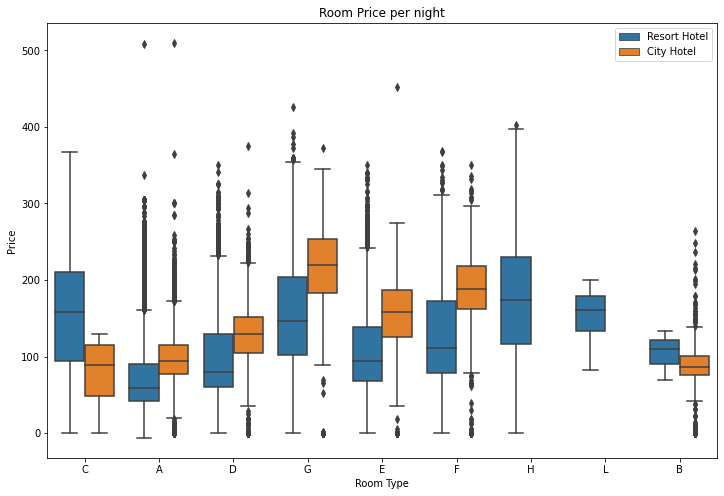

In [137]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel', data=data2)
plt.title("Room Price per night")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.legend()
plt.show()

#### The figure above shows the average price per room, based on room type

In [138]:
resort_data = data1[(data1['hotel']=="Resort Hotel") & (data1['is_canceled']==0)]
city_data = data1[(data1['hotel']=="City Hotel") & (data1['is_canceled']==0)]

In [139]:
resort_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


## Trend in Price over the year 

In [140]:
resort_hotel = resort_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [141]:
city_hotel = city_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [142]:
all_hotels = resort_hotel.merge(city_hotel, on='arrival_date_month')
all_hotels.columns = ['month', 'resort_price', 'city_hotel_price']
all_hotels

,month,resort_price,city_hotel_price
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [143]:
# Sorting by Month
import sort_dataframeby_monthorweek as sd

In [144]:
def sort_data(df,colname):
    return sd.Sort_Dataframeby_Month(df,colname)

In [145]:
all_hotels=sort_data(all_hotels,'month')
all_hotels

,month,resort_price,city_hotel_price
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [146]:
all_hotels.columns

Index(['month', 'resort_price', 'city_hotel_price'], dtype='object')

In [147]:
px.line(all_hotels, x='month', y=['resort_price', 'city_hotel_price'], title="Price per night")

### Conclusion: Prices of Resort Hotel are at peak during the summer and the price of the city hotel and is highest during May and August.

In [148]:
resort_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [149]:
resort_guests = resort_data['arrival_date_month'].value_counts().reset_index()
resort_guests.columns = ['month', 'no. of guests']
resort_guests

,month,no. of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [150]:
city_guests = city_data['arrival_date_month'].value_counts().reset_index()
city_guests.columns = ['month', 'no. of guests']
city_guests

,month,no. of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [151]:
all_guests = resort_guests.merge(city_guests, on='month')
all_guests

,month,no. of guests_x,no. of guests_y
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [152]:
all_guests.columns = ['month', 'no. of guests in resort', 'no. of guests in city hotel']
all_guests

,month,no. of guests in resort,no. of guests in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [153]:
all_guests = sort_data(all_guests, 'month')
all_guests

,month,no. of guests in resort,no. of guests in city hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [154]:
all_guests.columns

Index(['month', 'no. of guests in resort', 'no. of guests in city hotel'], dtype='object')

In [155]:
px.line(all_guests, x='month', y=['no. of guests in resort', 'no. of guests in city hotel'], title="Total No. of Guests")

### Conclusion 

The City hotel has more guests during spring and autumn, and the price the highest. In July and August, there no. of guests are the least even with lower prices.

The number of customers the Resort hotel increases from June to August, when the prices are highest. Both hotels have the least number of customers in Winter.

## Identifying Importance Features using Correlation

In [156]:
data1.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


In [157]:
cor = data1.corr()['is_canceled']
cor

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
company                          -0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [158]:
cor.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [159]:
data1.groupby('is_canceled')['reservation_status'].value_counts()

is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42993
             No-Show                1206
Name: reservation_status, dtype: int64

In [160]:
list_not = ['days_in_waiting_list','arrival_date_year']

In [161]:
num_features = [col for col in data1.columns if data1[col].dtype!='O' and col not in list_not]
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [162]:
data1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [163]:
not_cat = ['arrival_date_year', 'assigned_room_type', 'booking_changes', 'reservation_status', 'country', 'days_in_waiting_list']
not_cat

['arrival_date_year',
 'assigned_room_type',
 'booking_changes',
 'reservation_status',
 'country',
 'days_in_waiting_list']

In [164]:
cat_features = [col for col in data1.columns if data1[col].dtype=='O' and col not in not_cat] 
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [165]:
data_cat = data1[cat_features]
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,7/2/2015
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,7/2/2015
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,7/3/2015


In [166]:
data_cat.dtypes

hotel                      object
arrival_date_month         object
meal                       object
market_segment             object
distribution_channel       object
reserved_room_type         object
deposit_type               object
customer_type              object
reservation_status_date    object
dtype: object

In [167]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [168]:
 data_cat['reservation_status_date'] = pd.to_datetime(data_cat['reservation_status_date'])

In [169]:
data_cat['year'] = data_cat['reservation_status_date'].dt.year
data_cat['month'] = data_cat['reservation_status_date'].dt.month
data_cat['day'] = data_cat['reservation_status_date'].dt.day

In [170]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3


In [171]:
data1.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [172]:
data_cat.drop('reservation_status_date', axis=1, inplace=True)

In [173]:
data_cat['cancellation'] = data1['is_canceled']

In [174]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2,0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2,0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3,0


In [175]:
data_cat['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

# Feature Encoding

### Mean Encoding Technique

In [176]:
# Exclusion of Cancellation column as it is dependent variable

cols = data_cat.columns[0:8]
cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [177]:
data_cat.groupby(['hotel'])['cancellation'].mean()

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: cancellation, dtype: float64

In [178]:
for col in cols:
    print(data_cat.groupby([col])['cancellation'].mean().to_dict())
    print('\n')

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}


{'April': 0.40783534934103627, 'August': 0.37782266791717767, 'December': 0.35034768456872317, 'February': 0.3344510680576254, 'January': 0.305016044587063, 'July': 0.37464409996836445, 'June': 0.41485954799158203, 'March': 0.32227682227682225, 'May': 0.3970288624787776, 'November': 0.31309998523113275, 'October': 0.38090966179241054, 'September': 0.3919047619047619}


{'BB': 0.3741055553146277, 'FB': 0.5989974937343359, 'HB': 0.3446534790427445, 'SC': 0.3740638923120675, 'Undefined': 0.2446535500427716}


{'Aviation': 0.22127659574468084, 'Complementary': 0.12225274725274725, 'Corporate': 0.18761832639151838, 'Direct': 0.15371165156572883, 'Groups': 0.6110858471022181, 'Offline TA/TO': 0.3433132081713671, 'Online TA': 0.3675897035881435, 'Undefined': 1.0}


{'Corporate': 0.22056833558863329, 'Direct': 0.1748682499486688, 'GDS': 0.19170984455958548, 'TA/TO': 0.41059846547314577, 'Undefined': 0.8}


{'A': 0.391566

In [179]:
for col in cols:
    dict = data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col] = data_cat[col].map(dict)

In [180]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0


In [181]:
dataframe = pd.concat([data_cat, data1[num_features]], axis=1)
dataframe.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.0,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.0,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.0,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.0,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.0,0,1


In [182]:
# Remove 'Cancellation' column as it is repeated

dataframe.drop('cancellation', axis=1, inplace=True)

In [183]:
dataframe.shape

(119210, 29)

### Identify and Handle Outliers

In [184]:
dataframe.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.0,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.0,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.0,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.0,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.0,0,1


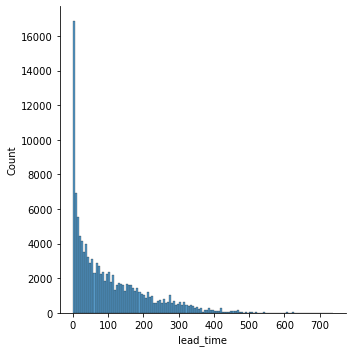

In [185]:
# Distribution Plot of lead_time - With Outliers
sns.displot(dataframe['lead_time'])

In [186]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

In [187]:
handle_outlier(['lead_time'])

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

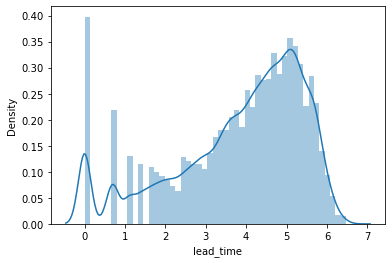

In [188]:
# Distribution Plot of lead_time - Without Outliers
sns.distplot(dataframe['lead_time'].dropna())

<AxesSubplot:xlabel='adr', ylabel='Density'>

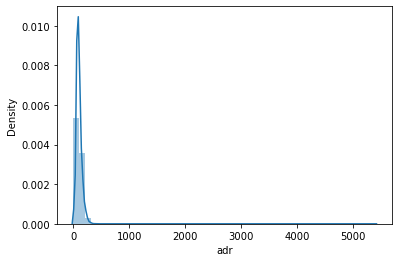

In [189]:
# Distribution Plot of adr - With Outliers
sns.distplot(dataframe['adr'])

In [190]:
handle_outlier('adr')

<AxesSubplot:xlabel='adr', ylabel='Density'>

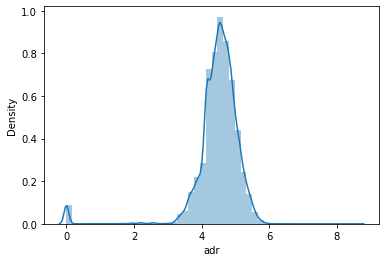

In [191]:
# Distribution Plot of adr - Without Outliers
sns.distplot(dataframe['adr'].dropna())

### Feature Importance

In [192]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               1
required_car_parking_spaces 

In [193]:
#Drop the 1 missing value
dataframe.dropna(inplace=True)

In [194]:
y = dataframe['is_canceled']
x = dataframe.drop('is_canceled',axis=1)

In [195]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [196]:
feature_sel_model.get_support()

array([False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
        True])

In [197]:
#True = Has significance, False, = No signficance

In [198]:
cols = x.columns

In [199]:
selected_features = cols[feature_sel_model.get_support()]

In [200]:
print('total_features {}'.format(x.shape[1]))
print('selected_features {}'.format(len(selected_features)))

total_features 28
selected_features 14


In [201]:
selected_features

Index(['deposit_type', 'year', 'month', 'day', 'lead_time',
       'arrival_date_week_number', 'adults', 'children',
       'previous_cancellations', 'booking_changes', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [202]:
x = x[selected_features]
x.head()

,deposit_type,year,month,day,lead_time,arrival_date_week_number,adults,children,previous_cancellations,booking_changes,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.28402,2015,7,1,5.837730,27,2,0.0,0,3,0.0,0.000000,0,0
1,0.28402,2015,7,1,6.603944,27,2,0.0,0,4,0.0,0.000000,0,0
2,0.28402,2015,7,2,2.079442,27,1,0.0,0,0,0.0,4.330733,0,0
3,0.28402,2015,7,2,2.639057,27,1,0.0,0,0,0.0,4.330733,0,0
4,0.28402,2015,7,3,2.708050,27,2,0.0,0,0,0.0,4.595120,0,1


### Split Dataset & Develop Model

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=27)

In [205]:
#Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [206]:
y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [207]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[15806,  2906],
       [ 4470,  6621]], dtype=int64)

In [208]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7525081367647553

In [209]:
# Cross Validating Model 

In [210]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(logreg, x, y, cv=10)
score

array([0.67083298, 0.71957051, 0.71059475, 0.7219193 , 0.71512457,
       0.73609597, 0.57746833, 0.79515141, 0.72410033, 0.6227349 ])

In [211]:
score.mean()

0.6993593048812963

### Testing with Multiple Algorithms

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [213]:
### Classifier Models
models = []

models.append(('LogisticRegression', LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('Naive Bayes',GaussianNB()))

In [214]:
# Testing Model Accuracy
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    
    print(confusion_matrix(predictions, y_test),'\n')
    
    accuracy = str(round(accuracy_score(predictions,y_test)*100, 2))
    
    print("Accuracy =", accuracy, '%', '\n')

LogisticRegression
[[15806  4470]
 [ 2906  6621]] 

Accuracy = 75.25 % 

Decision Tree
[[17915   757]
 [  797 10334]] 

Accuracy = 94.79 % 

RandomForest
[[18605  1227]
 [  107  9864]] 

Accuracy = 95.52 % 

KNN
[[18528  1444]
 [  184  9647]] 

Accuracy = 94.54 % 

Naive Bayes
[[ 8431  1191]
 [10281  9900]] 

Accuracy = 61.51 % 

